<a href="https://colab.research.google.com/github/KILjungjoon/Image-PDFtoText/blob/main/OCRtoTXTinCOLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Text in Different Language From Image In Python 

[I used the program of jaided.ai. Here is link.](https://www.jaided.ai/)

## Easy OCR   

**(Please reformulate this text)** EasyOCR is a python module for extracting text from image. It is a general OCR that can read both natural scene text and dense text in document. We are currently supporting 80+ languages and expanding. 

I have run all these instructions on my Google Colab. For those using Windows, an installation of torch and torchvision is required using the following command line 

In [1]:
# For windows users
!conda install pytorch torchvision torchaudio cpuonly -c pytorch

/bin/bash: conda: command not found


In [2]:
# Otherwise 
%%capture
!pip install easyocr

Since the image to extract text from can be an OpenCV image object, we need to install OpenCV library, otherwise we will be facing errors.  

### OpenCV

In [3]:
# Install OpenCV
%%capture
!pip install opencv-python-headless==4.1.2.30

The next step after installing the library is to load the model using the **Reader** class that takes in parameter a list of languages we want the model to take into consideration, which correspond most of the time of the languages required by our use case. Each language is represented by a code name; for instance: 
- ko for Korean  
- en for English
- ch_tra for Traditional Chinese
- ch_sim for Simplified Chinese 
- ja for Japanese 
- etc. 
The whole list is available from [here](https://www.jaided.ai/easyocr/)


Loading the model could take a bit longer, but it is a one time process, because multiple running is not required. In case you don't have any GPU, or if you are dealing with a low memory GPU, you can simply use your CPU after deactivating your GPU by setting the gpu=False in the Reader class.  

Disclaimer: even if it is possible to provide a list of languages, it is important to know that not all languages are compatible (can not be read together)

#### Output of the Reader.   
The default output is a list of tuples, and each tuple is in this format. 
- ([bounding box cordinates], *the actual text detected*, the confidence level of detection) 

If you want only the text format, you can set the detail=0 in the readtext function like this: **reader.readtext(my_image, detail = 0)**

In [13]:
# Import the library
import easyocr

# Multiple language models cannot be read from one code.Read separately as follows.
reader_ko_en = easyocr.Reader(['ko','en'])
reader_ja_en = easyocr.Reader(['ja','en'])
reader_ch_en = easyocr.Reader(['ch_sim','en'])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [7]:
from IPython.display import Image
import requests

def show_image(image_name):
  return Image(filename=image_name) 

def read_text(image_name, model_name, in_line=False):

  # Read the data
  text = model_name.readtext(image_name, detail = 0, paragraph=in_line)

  return '\n'.join(text)

Let's understand the previous functions.  
- The first one show_image simply shows the image given in parameter. 
- The second one aims to read the content and returns in plaint text. 
  - by default the readtext function with detail = 0 returns a list of text on each column. Then the parameter paragraphe=True means that we read line wise.

### **Extraction Process**

#### **Multiple Language Image**

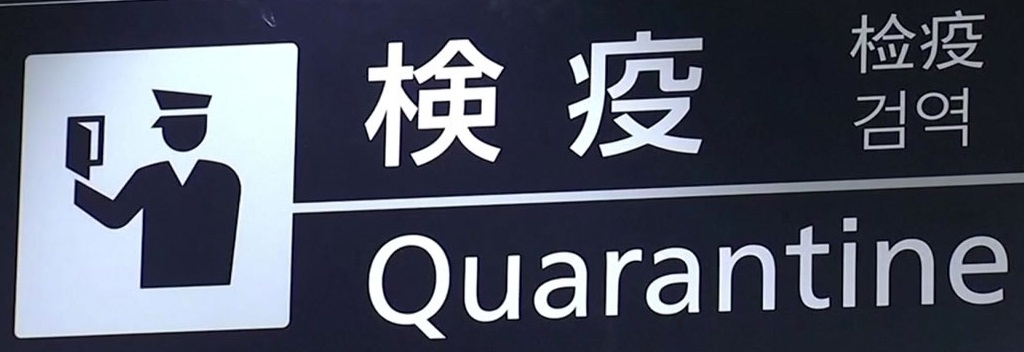

In [8]:
show_image("/content/Quarantine검역.jpg")

In [15]:
text = read_text("/content/Quarantine검역.jpg", reader_ko_en)
print(text)

#쇼j표
# %표
검역
Quarantine


In [14]:
text = read_text("/content/Quarantine검역.jpg", reader_ja_en)
print(text)

桧渡
検渡
召明
Quarantine


In [16]:
text = read_text("/content/Quarantine검역.jpg", reader_ch_en)
print(text)

检疫
换  疫
召9}
Quarantine


Question : Can't it read more than 3 languages at the same time?